# Experiment 2: Intersecting curves on a Hirzebruch surface

In this notebook we use the Cox homotopy to intersect curves on the Hirzebruch surface $\mathscr{H}_2$.

We activate the project's environment.

In [1]:
using Pkg
Pkg.activate(".")

 Activating environment at `~/Documents/Projects/cox-homotopies/code_cox_homotopies_fix/Project.toml`


We first load our routines.

In [2]:
include("CoxHomotopy.jl")

polymake version 4.2
Copyright (c) 1997-2020
Ewgenij Gawrilow, Michael Joswig, and the polymake team
Technische Universität Berlin, Germany
https://polymake.org

This is free software licensed under GPL; see the source for copying conditions.
There is NO warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



trackPathRandom (generic function with 1 method)

We generate two bivariate equations.

In [3]:
n = 2;
@polyvar t[1:n];

f̂ = [1 + t[1] + t[2] + t[1]*t[2] + t[1]^2*t[2] + t[1]^3*t[2]; 1 + t[1] + 2*t[2] + 3*t[1]*t[2] + 4*t[1]^2*t[2] + 1*t[1]^3*t[2]];
f̂ = [1 + t[1] + t[2]*(t[1]-1)*(1+sum(map(i->randn()*t[1]^i,1:2))); 1 + t[1] + t[2]*(t[1]-1)*(1+sum(map(i->randn()*t[1]^i,1:2)))]


2-element Array{DynamicPolynomials.Polynomial{true,Float64},1}:
 0.05806552135240145t₁³t₂ + 0.6585371385165921t₁²t₂ + 0.2833973401310065t₁t₂ + t₁ - t₂ + 1.0
 -0.6777627828386437t₁³t₂ - 0.3354151169325752t₁²t₂ + 2.013177899771219t₁t₂ + t₁ - t₂ + 1.0

We compute the polytope information.

In [4]:
P, Fᵀ, a = computePolytope(f̂);

polymake: used package ppl
  The Parma Polyhedra Library ([[wiki:external_software#PPL]]): A C++ library for convex polyhedra
  and other numerical abstractions.
  http://www.cs.unipr.it/ppl/



We solve the system using the Cox homotopy.

In [5]:
@time homSols, f, toricSols, Fᵀ, x̂, K, B, data = coxHomotopy(f̂; fixSlice = true, details = true);

Tracking 5 paths... 100%|███████████████████████████████| Time: 0:00:03
  # paths tracked:                  5
  # non-singular solutions (real):  3 (1)
  # singular endpoints (real):      2 (2)
  # total solutions (real):         5 (3)
 99.243840 seconds (147.51 M allocations: 7.115 GiB, 3.98% gc time)


We compute the residuals of the toric solutions and the solutions in their homogeneous coordinates.

In [6]:
display(get_residual(f̂,toricSols,t))
display(get_residual(f,homSols,variables(f)))

4-element Array{Float64,1}:
 4.983566618666463e-16
 1.6896212209755642e-15
 8.510388973646884e-16
 5.590671750629067e-16

4-element Array{Float64,1}:
 1.4532882530794507e-16
 1.0392871828103176e-16
 4.76849303331705e-17
 8.301564570983389e-17

We plot the magnitude of the homogeneous coordinates of the solutions. Each solution corresponds to a column in the table and each row represents a Cox coordinate. Dark (blue) colors indicate small absolute values. The plot shows that only one solution is in the torus. The others are on the divisors $D_1, D_2$ and $D_3$.

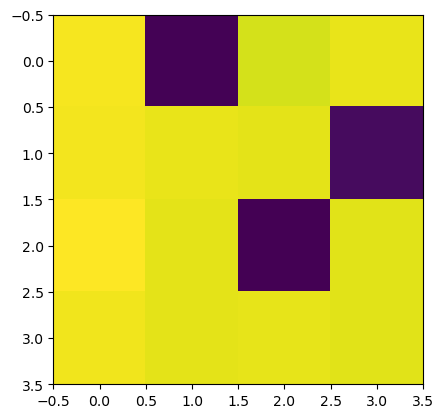

PyObject <matplotlib.image.AxesImage object at 0x1717efa90>

In [7]:
using PyPlot
imshow(log10.(abs.(hcat(homSols...))))

To illustrate the orthogonal slicing method from Section 4.4 in our paper, we generate some equations of a higher degree on the same toric variety. 

In [8]:
Pbig = @pm polytope.Polytope(FACETS = hcat(5*a, Fᵀ))
exps = getLatticePoints(Pbig,t)
mons = [prod(t.^exps[ℓ,:]) for ℓ = 1:size(exps,1)]
cmatrix = randn(2,length(mons))
f̂ = [cmatrix[ℓ,:]'*mons for ℓ = 1:2];

We compute a generic start system and track the solution with index "solidx" (chosen randomly) using 10 different random, fixed linear spaces.

Tracking 100 paths... 100%|█████████████████████████████| Time: 0:00:05
  # paths tracked:                  100
  # non-singular solutions (real):  100 (0)
  # singular endpoints (real):      0 (0)
  # total solutions (real):         100 (0)
random slice number 1
residual: [2.192605620372045e-15]
computed solution: Any[Complex{Float64}[-0.9435568420123194 - 0.7186876207894058im, -0.12627798197757817 - 0.7093135213405122im]]
random slice number 2
residual: [8.11008485843051e-15]
computed solution: Any[Complex{Float64}[-0.9435568420123194 - 0.718687620789406im, -0.12627798197757847 - 0.709313521340512im]]
random slice number 3
residual: [3.822952235577765e-15]
computed solution: Any[Complex{Float64}[-0.9435568420123203 - 0.7186876207894048im, -0.1262779819775769 - 0.7093135213405132im]]
random slice number 4
residual: [1.4554301722940714e-15]
computed solution: Any[Complex{Float64}[-0.9435568420123199 - 0.7186876207894057im, -0.12627798197757822 - 0.7093135213405118im]]
random slice numb

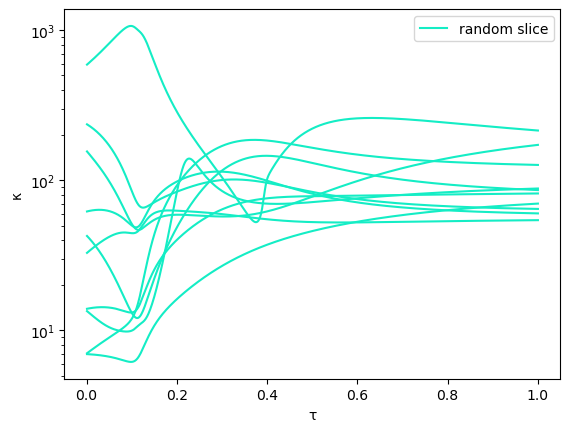

residual: [7.12921520249232e-15]
computed solution: Any[Complex{Float64}[-0.9435568420123192 - 0.718687620789406im, -0.1262779819775785 - 0.7093135213405122im]]


In [9]:
ĝ,pt = computeStartSystem(f̂)
homStartsols, p, fullHomStartsols = solveGeneric(ĝ, pt, Fᵀ)
γ = randn(ComplexF64)
(k,n) = size(Fᵀ)
@polyvar x[1:4]
f, αf = homogenize(f̂, Fᵀ,x)
g, αg = homogenize(ĝ, Fᵀ,x)
Δt = 0.001 #discretization step for naive homotopy algorithm

numexps = 10
solidx = 37
κᵣ = fill([],numexps)
torsols = fill([],numexps)
linslices = fill([],numexps)
for i = 1:numexps
    println("random slice number " *string(i))
    zᵣ, κᵣ[i], linslices[i] = trackPathRandom(f, g, x, fullHomStartsols[solidx], n, k, Δt,γ)
    if i == 1
        semilogy(1:-Δt:Δt,κᵣ[i],color = "#14edc5", label="random slice")
    else
        semilogy(1:-Δt:Δt,κᵣ[i],color = "#14edc5")
    end
    println("residual: " * string(get_residual(f,[zᵣ],x)))
    torsols[i] = dehomogenizeSolutions([zᵣ], Fᵀ)
    println("computed solution: " * string(torsols[i]))
end
legend()
xlabel("τ")
ylabel("κ")

meanκ = 10.0.^(sum([log10.(ℓ) for ℓ ∈ κᵣ])/numexps);

We track the same path using orthogonal slicing. 

In [10]:
NF = smith(Fᵀ);
PP = round.(Int,inv(NF.S));
@time zₒ, κₒ = trackPathOrthogonal(f, g, x, fullHomStartsols[solidx], PP, n, k, Δt, γ);

torsolorth = dehomogenizeSolutions([zₒ], Fᵀ);
println("computed solution: " * string(torsolorth))

  7.913868 seconds (42.21 M allocations: 3.240 GiB, 18.43% gc time)
computed solution: Array{Complex{Float64},1}[[-0.943564463360381 - 0.7186843756977505im, -0.12626882538510648 - 0.7093180148951576im]]


We plot the results.

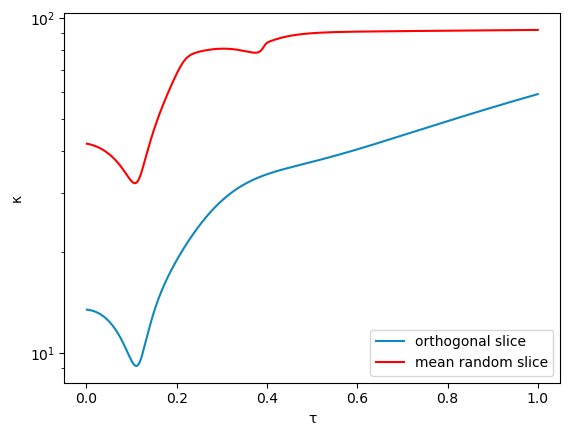

PyObject <matplotlib.legend.Legend object at 0x15c516790>

In [11]:
semilogy(1:-Δt:Δt,κₒ,color = "#0f87bf", label = "orthogonal slice")
semilogy(1:-Δt:Δt,meanκ, color = "#ff0000", label = "mean random slice")
xlabel("τ")
ylabel("κ")
#legend(["orthogonal slice", "random slice"])
legend()